In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

nx,ny=64,64#146

features=np.load('features16384.npy')[:nx,60:60+ny,:]

X = np.reshape(features, (nx*ny,16384))

connectivity = grid_to_graph(n_x=128, n_y=128)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=2048)#,linkage='complete')

agglo.fit(X)
FA_spatial=agglo.transform(X)
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3


In [2]:
from sklearn.decomposition import PCA

n_pca=256
pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(FA_spatial)#components_



[0. 0. 0. ... 0. 0. 0.]


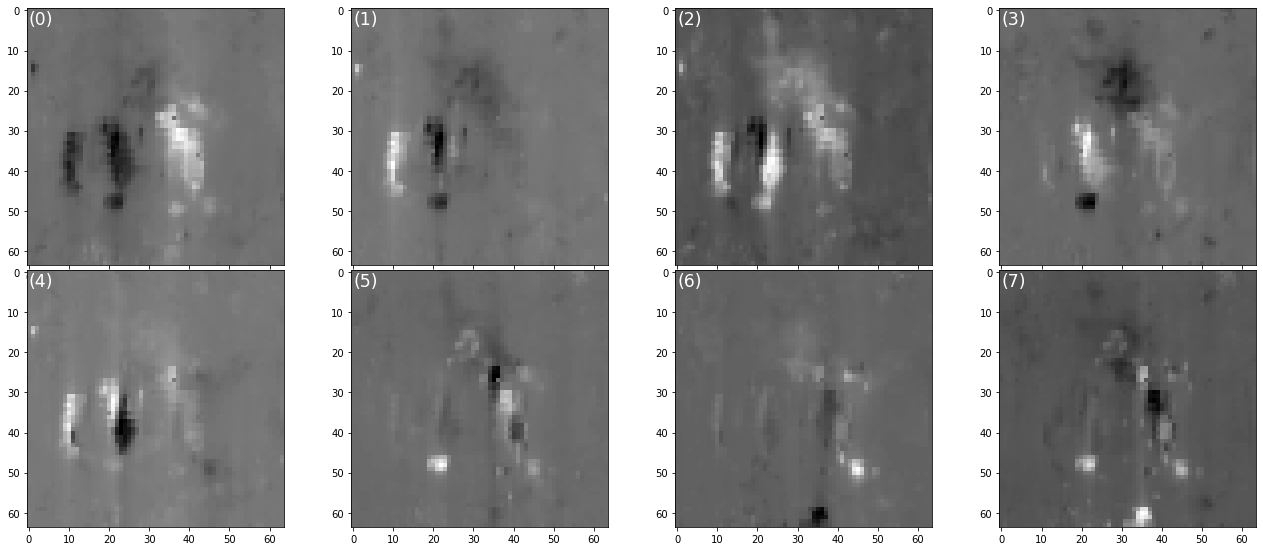

In [69]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

nx,ny=64,64#146

features=np.load('features16384.npy')[:nx,60:60+ny,:]

X = np.reshape(features, (nx*ny,16384))

connectivity = grid_to_graph(n_x=128, n_y=128)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=2048)#,linkage='complete')

agglo.fit(X)
FA_spatial=agglo.transform(X)
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))

from sklearn.decomposition import PCA

n_pca=2048
pca = PCA(n_components=n_pca, svd_solver='randomized')

id_zero=np.abs(FA_spatial[:,0]).argmin()
print(FA_spatial[id_zero])
pca_features=pca.fit_transform(np.delete(FA_spatial,id_zero,0))#components_
pca_features=np.insert(pca_features,id_zero,np.zeros(n_pca),0)



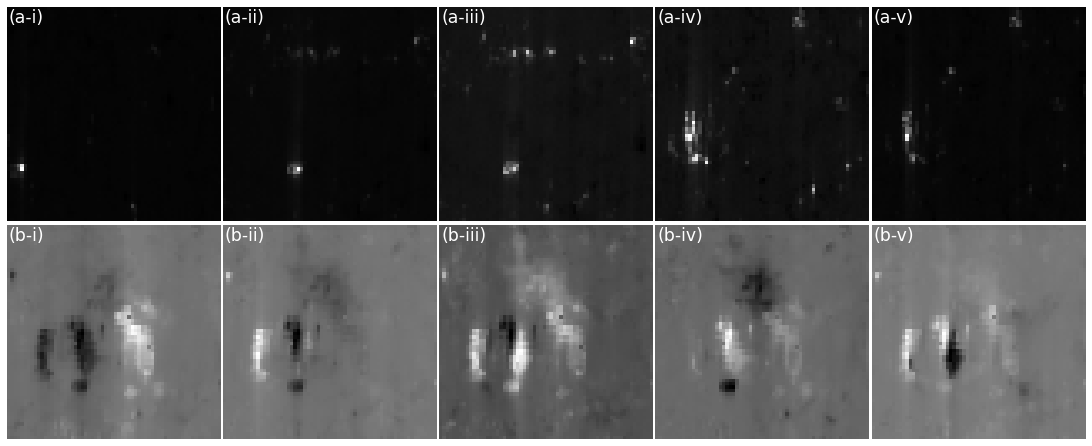

In [85]:
rom=['i','ii','iii','iv','v','vi','vii','viii']

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=2, ncols=5, left=0, right=1.25,bottom=0,top=0.5, wspace=0.002,hspace=0.02)

for i in range(1):
    for j in range(5):
        ax = fig.add_subplot(gs[i,j])
        ax.axis('off')
        ax.imshow(FA_spatial[:,j].reshape((64,64)),cmap='gray')
        ax.text(0,0,"(a-%s)"%(rom[j]),size='xx-large',verticalalignment='top',color='white')

for i in range(1,2):
    for j in range(5):
        ax = fig.add_subplot(gs[i,j])
        ax.axis('off')
        ax.imshow(pca_features[:,j].reshape((64,64)),cmap='gray')
        ax.text(0,0,"(b-%s)"%(rom[j]),size='xx-large',verticalalignment='top',color='white')

plt.savefig('fig4.tif',format='tif',bbox_inches ='tight')


In [67]:
print(pca_features.shape)
si,sj=id_zero//64,id_zero%64

print(pca_features.reshape((64,64,2048))[si,sj,:])
print(FA_spatial.reshape((64,64,2048))[si,sj,:])

(4096, 2048)
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
